In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

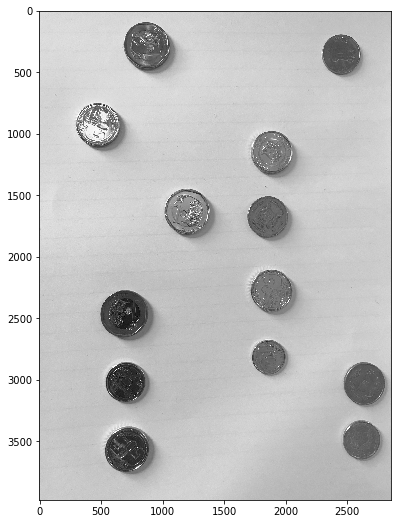

In [20]:
image="coin.jpg"
img=cv2.imread(image,1)
img_orig=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img,cmap='gray')

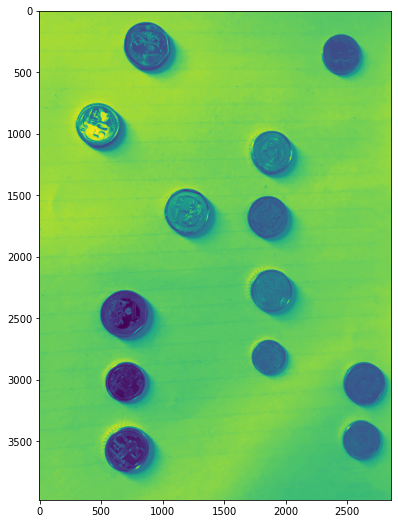

In [21]:
img=cv2.GaussianBlur(img,(29,29),cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img)

In [22]:
all_coins=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,0.9,120,param1=50,param2=30,minRadius=100,maxRadius=185)
all_coins_r=np.uint16(np.around(all_coins))
#Detect the coins

In [23]:
a=all_coins_r
print(all_coins_r.shape)
print('found'+str(all_coins_r.shape[1]))
print(all_coins_r)
#the below list contains x,y,r meaning x,y axes points of the coins and their respective radius

(1, 13, 3)
found13
[[[ 868  276  178]
  [ 678 2470  180]
  [ 474  936  167]
  [1202 1634  183]
  [2638 3026  168]
  [1886 2276  169]
  [1888 1142  161]
  [ 706 3578  172]
  [ 696 3026  156]
  [1858 1678  167]
  [2452  350  152]
  [1872 2816  143]
  [2630 3486  166]]]


In [33]:
c=1
for i in all_coins_r[0,:]:
    cv2.circle(img_orig,(i[0],i[1]),i[2],(50,200,200),5)
    cv2.circle(img_orig,(i[0],i[1]),2,(255,0,0),3)
    cv2.putText(img_orig,"coin"+str(c),(i[0]-70,i[1]+30),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),10)
    c+=1

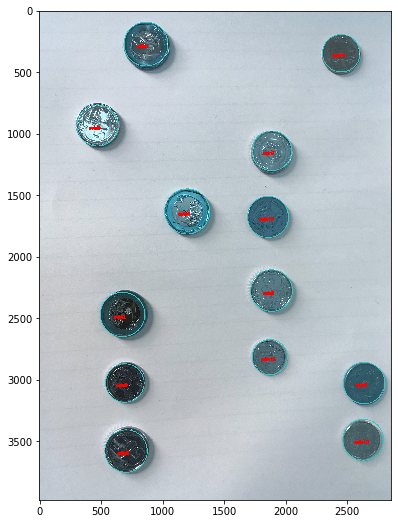

In [34]:
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_orig)
#Detected coins circled

In [26]:

b=[]
for i in a :
    for j in i:
       b.append(j)  
print(b)     

[array([868, 276, 178], dtype=uint16), array([ 678, 2470,  180], dtype=uint16), array([474, 936, 167], dtype=uint16), array([1202, 1634,  183], dtype=uint16), array([2638, 3026,  168], dtype=uint16), array([1886, 2276,  169], dtype=uint16), array([1888, 1142,  161], dtype=uint16), array([ 706, 3578,  172], dtype=uint16), array([ 696, 3026,  156], dtype=uint16), array([1858, 1678,  167], dtype=uint16), array([2452,  350,  152], dtype=uint16), array([1872, 2816,  143], dtype=uint16), array([2630, 3486,  166], dtype=uint16)]


In [27]:
b=sorted(b,key=lambda x:x[0])

In [28]:
for i in b:
    print(i)
#sort the array wrt to x axis     

[474 936 167]
[ 678 2470  180]
[ 696 3026  156]
[ 706 3578  172]
[868 276 178]
[1202 1634  183]
[1858 1678  167]
[1872 2816  143]
[1886 2276  169]
[1888 1142  161]
[2452  350  152]
[2630 3486  166]
[2638 3026  168]


In [29]:
from collections import defaultdict
#for coins before a particular coin find if the value(x+r) of all coins before it is greater than or equal to the x of the coin
#if yes append it to the dict
#similarly for coins after a particular coin check as done below
#this is done for each and every coin(13 coins)
def algo(b):
    c=defaultdict(list)
    for i in range(len(b)):
        for j in range(0,i):
            r=b[j][0]+b[j][2]
            if(r>=b[i][0]):
                c[i].append(j)
        for k in range(i+1,len(b)):
            r=b[k][0]-b[k][2]
            if(r<=b[i][0]):
                c[i].append(k)
    return(c)
#the algorithm for finding coins which fall under the same line

In [30]:
algo(b)

defaultdict(list,
            {1: [2, 3],
             2: [1, 3, 4],
             3: [1, 2, 4],
             4: [3],
             6: [7, 8, 9],
             7: [6, 8, 9],
             8: [6, 7, 9],
             9: [6, 7, 8],
             11: [12],
             12: [11]})

## This dictionary contains the list of neary coins which will fall under the same line when we draw a line from the center of the key element of the dictionary.

ALGORITHM FOR DRAWING LINES:
1)Sort dictionary by no of elements inside the key
so say, we first draw lines through 9(6,7,8,9)
2)since we have already drew through (6,7,8,9) keys 6,7,8 are omitted
3)next we have 3, so draw lines through(1,2,3,4)
4)skip 2,1,4(already drawn)
5)now 11,12 draw a line
6)key 12 already drawn


In [31]:
img_orig2=img_orig.copy()
img_orig2=cv2.line(img_orig2,(706,0),(706,4000),(255,0,0),10)
img_orig2=cv2.line(img_orig2,(1888,0),(1888,4000),(255,0,0),10)
img_orig2=cv2.line(img_orig2,(2630,0),(2630,4000),(255,0,0),10)



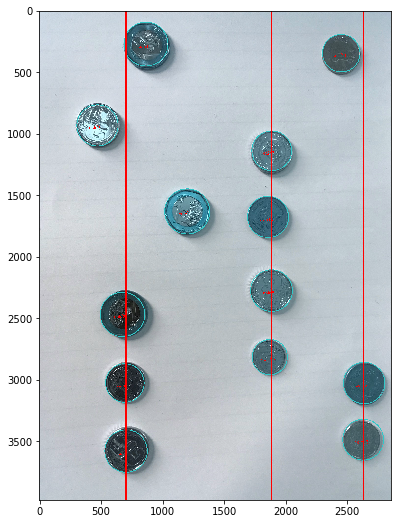

In [32]:
plt.imshow(img_orig2)